## Without stimuli: original case

#### Original phase plot without stimuli

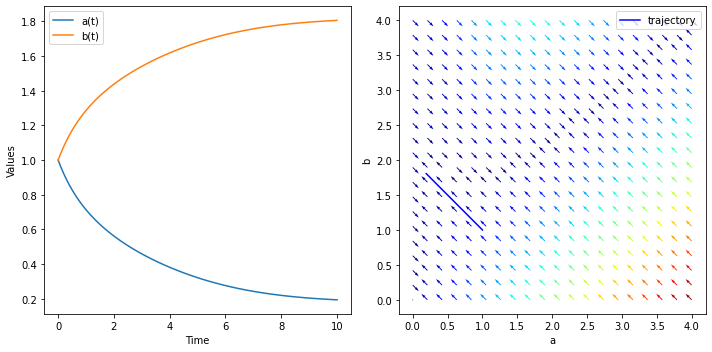

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs
def model(y, t, params):
    a, b = y
    k0, r, k, delta = params
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    dadt = k_ba * b - k_ab * a
    dbdt = -dadt
    return [dadt, dbdt]

# initial conditions
a0 = 1
b0 = 1
y0 = [a0, b0]

# parameters
k0 = 1/15
r = 1
k = 1
delta = 1
params = [k0, r, k, delta]

t = np.linspace(0, 10, 100)
y = odeint(model, y0, t, args=(params,))
A, B = np.meshgrid(np.linspace(0, 4, 20), np.linspace(0, 4, 20))
dA, dB = model([A, B], None, params)

N = np.sqrt(dA**2 + dB**2)
N[N == 0] = 1e-6  
dA /= N
dB /= N

# plot results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, y[:, 0], label='a(t)')
plt.plot(t, y[:, 1], label='b(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.quiver(A, B, dA, dB, N, cmap='jet')
plt.plot(y[:, 0], y[:, 1], 'b-', label='trajectory')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()

plt.tight_layout()
plt.show()


#### Bifurcation plot

c:\Users\19526\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


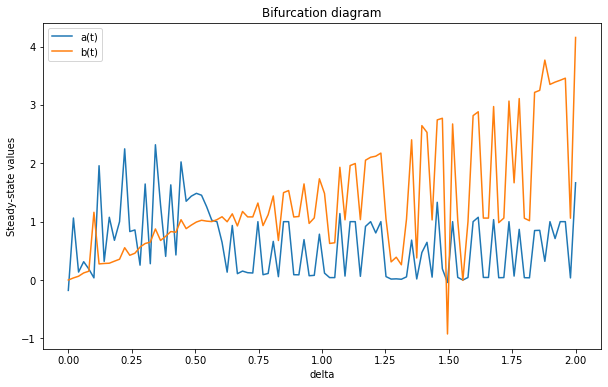

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the system of ODEs
def model(y, t, params):
    a, b = y
    k0, r, k, delta = params
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    dadt = k_ba * b - k_ab * a
    dbdt = -dadt
    return [dadt, dbdt]

def find_steady_state(params):
    def steady_state_equations(y):
        return model(y, None, params)

    y0_guess = [1, 1]
    return fsolve(steady_state_equations, y0_guess)

# Parameters
k0 = 1/15
r = 1
k = 1
params = [k0, r, k]

delta_values = np.linspace(0, 2, 100)
steady_states = np.array([find_steady_state(params + [delta]) for delta in delta_values])

# Plot bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot(delta_values, steady_states[:, 0], label='a(t)')
plt.plot(delta_values, steady_states[:, 1], label='b(t)')
plt.xlabel('delta')
plt.ylabel('Steady-state values')
plt.title('Bifurcation diagram')
plt.legend()

plt.show()

## With stimuli: constant stimuli

#### With stimuli (constant part)

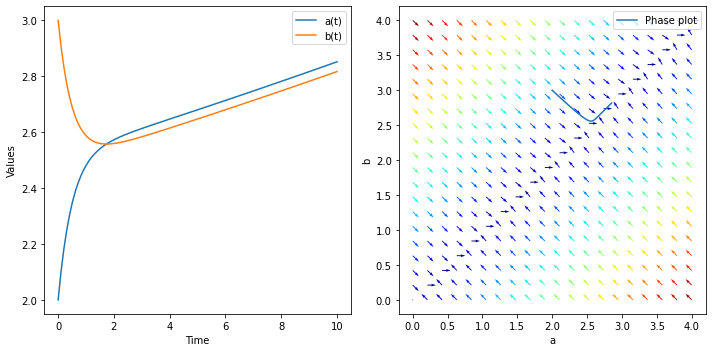

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define system of ODEs
def system(y, t, k_ab, k_ba, k_s):
    a, b = y
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

# Set initial conditions
a0 = 2.0
b0 = 3.0

# Set parameters
k_ab = 1.0
k_ba = 1.0
k_s = 0.05/2

t = np.linspace(0, 10, 100)
y = odeint(system, [a0, b0], t, args=(k_ab, k_ba, k_s))
A, B = np.meshgrid(np.linspace(0, 4, 20), np.linspace(0, 4, 20))
dA, dB = system([A, B], 0, k_ab, k_ba, k_s)

N = np.sqrt(dA**2 + dB**2)
N[N == 0] = 1e-6  
dA /= N
dB /= N

# Plot results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, y[:, 0], label='a(t)')
plt.plot(t, y[:, 1], label='b(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.subplot(1,2,2)
plt.quiver(A, B, dA, dB, N, cmap='jet')  # Add this line to plot the vector field
plt.plot(y[:, 0], y[:, 1], label='Phase plot')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()

plt.tight_layout()
plt.show()


#### Bifurcation plot

c:\Users\19526\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\19526\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
c:\Users\19526\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


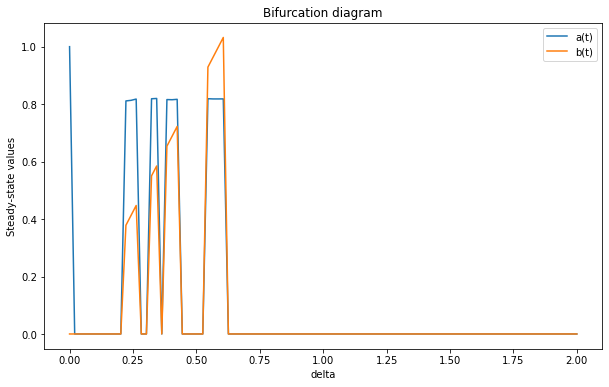

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the system of ODEs
def model(y, t, params):
    a, b = y
    k0, r, k, delta = params
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    s = 0.05
    k_s = s / 2
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

def system(y, t, k_ab, k_ba, k_s):
    a, b = y
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

def find_steady_state(params):
    def steady_state_equations(y):
        return model(y, None, params)

    y0_guess = [1, 1]
    return fsolve(steady_state_equations, y0_guess)

# Parameters
k0 = 1/15
r = 1
k = 1

params = [k0, r, k]
delta_values = np.linspace(0, 2, 100)
steady_states = np.array([find_steady_state(params + [delta]) for delta in delta_values])

# Plot bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot(delta_values, steady_states[:, 0], label='a(t)')
plt.plot(delta_values, steady_states[:, 1], label='b(t)')
plt.xlabel('delta')
plt.ylabel('Steady-state values')
plt.title('Bifurcation diagram')
plt.legend()

plt.show()

## With stimuli: t-related stimuli

#### Phase plane for t-related stimuli

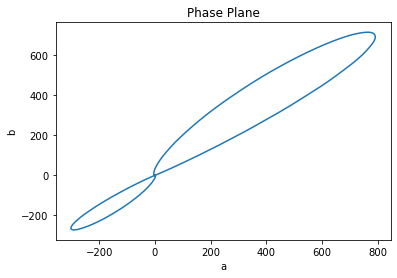

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_system(t, y, k0, r, delta, s):
    a, b = y
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    k_s = s(t) * 2
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 1000)
y0 = [1, 0]
k = 1/15
r = 1
delta = 1
s = lambda t: np.cos(t/10)

solution = solve_ivp(lambda t, y: ode_system(t, y, k, r, delta, s), t_span, y0, t_eval=t_eval)

plt.plot(solution.y[0], solution.y[1])
plt.xlabel('a')
plt.ylabel('b')
plt.title('Phase Plane')
plt.show()


#### Vector field for t-related stimuli

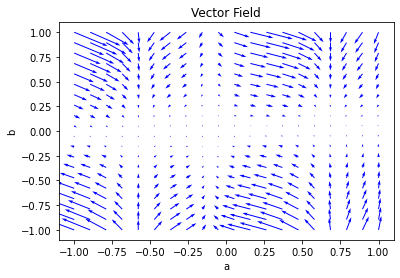

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system
def ode_system(t, y, k0, r, delta, s):
    a, b = y
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    k_s = s(t) * 2
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

# Define the parameters and time range
k = 0.5
r = 1
delta = 0.1
s = lambda t: np.cos(t/10)
t_range = np.linspace(0, 100, 20)
a_range = np.linspace(-1, 1, 20)
b_range = np.linspace(-1, 1, 20)

A, B = np.meshgrid(a_range, b_range)
dA, dB = ode_system(t_range, [A, B], k, r, delta, s)

# Plot the vector field
plt.quiver(A, B, dA, dB, color='b')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Vector Field')
plt.show()



#### Trajectory for a and b

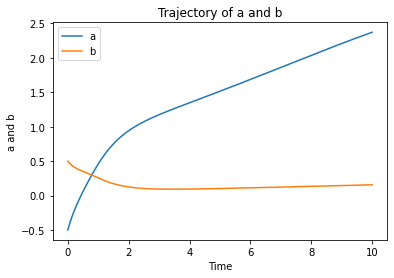

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE system
def ode_system(y, t, k0, r, delta, s):
    a, b = y
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    k_s = s(t) * 2
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

# Define the parameters and initial conditions
k = 0.5
r = 1
delta = 0.1
s = lambda t: np.cos(t/10)
y0 = [-0.5, 0.5]

t_range = np.linspace(0, 10, 1000)
sol = odeint(ode_system, y0, t_range, args=(k, r, delta, s))

# Plot the trajectory of a and b over time
plt.plot(t_range, sol[:, 0], label='a')
plt.plot(t_range, sol[:, 1], label='b')

plt.xlabel('Time')
plt.ylabel('a and b')
plt.title('Trajectory of a and b')
plt.legend()
plt.show()


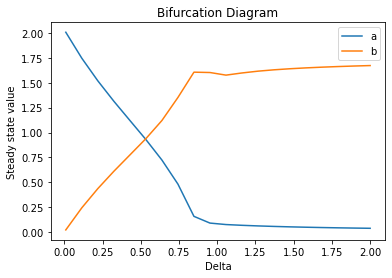

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system
def ode_system(t, y, delta, k0, r, k, s):
    a, b = y
    k_ba = k0 + r * a**2 / (k**2 + a**2)
    k_ab = delta
    s_t = s/4 * np.cos(t/10)
    k_s = s_t * 2
    dadt = (k_ba + k_s) * b - k_ab * a
    dbdt = k_ab * a - k_ba * b
    return [dadt, dbdt]

# Define the parameters
delta_values = np.linspace(0.01, 2.0, 20)  # Range of delta values to test
k0 = 1/15
r = 1
k = 1
s = 0.05

a_ss_values = []
b_ss_values = []
for delta in delta_values:
    sol = solve_ivp(lambda t, y: ode_system(t, y, delta, k0, r, k, s), [0, 100], [1, 1], rtol=1e-6, atol=1e-6)
    a_ss_values.append(sol.y[0][-1])  # Steady state value of a
    b_ss_values.append(sol.y[1][-1])  # Steady state value of b

# Plot the steady state values of a and b vs delta
plt.plot(delta_values, a_ss_values, label='a')
plt.plot(delta_values, b_ss_values, label='b')
plt.xlabel('Delta')
plt.ylabel('Steady state value')
plt.title('Bifurcation Diagram')
plt.legend()
plt.show()


